In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import seaborn as sbn

# Problem Statement

### Part 1 : Data Analysis

The attached CSV 'purchase2019.csv'file lists the customer, date, and dollar value of orders placed at a store in 2017. The actual gender and predicted gender of each customer is also provided. For each part, please state the insights or assumptions you think are valuable. 


In [2]:
data_pur=pd.read_csv('purchase2019.csv')
data_pur.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


A) Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
   Sort the dataframe by customer_id ascending and display the first 10 rows.



In [3]:
data_pur_recent=data_pur.groupby(['customer_id','gender'])['date'].max()
data_pur_recent=pd.DataFrame(data_pur_recent)
data_pur_recent.reset_index(inplace=True)
# print(data_pur_recent.head())
data_pur_count=data_pur.groupby(['customer_id'])['customer_id'].count()
data_pur_count=pd.DataFrame({'num':data_pur_count})
data_pur_count.reset_index(inplace=True)
# print(data_pur_count.head())
data_pur_assemble=data_pur_recent.merge(data_pur_count,on='customer_id',how='left')

In [4]:
data_pur_assemble.head(10)

,customer_id,gender,date,num
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


In [1]:
# data_pur_assemble.num.value_counts()
# data_pur_assemble.gender.value_counts()

My insights: 

1. The number of customers is balanced in the data.

2. The date of recent order ranges from January to December. Mainly focus on January. The time is maily in midnight or evening.

3. The number of orders of each customer is manily 1, and the larger order number is, the fewer frequency it has.

My assumptions:

1. The data is extracted manually from the population to balance the gender number on purpose.

2. The number of orders is in Poisson distribution.

B) Plot the count of orders per week for the store.

In [6]:
data_pur_date=data_pur_assemble.copy()
data_pur_date=data_pur_date.set_index('date',drop=True)
data_pur_date.index = pd.to_datetime(data_pur_date.index)
data_pur_date=data_pur_date.resample('W').sum()

C:\Users\wangj\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


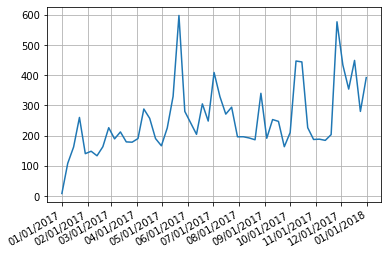

In [7]:
x=data_pur_date.index
y=data_pur_date['num']
fig = plt.figure()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().grid()
plt.plot(x, y) 
plt.gcf().autofmt_xdate()
plt.show()

My insights:

1. The counts of orders vary by week, but there seems to be some periodic patterns. For example in roughly every month, there is a peak which is usually in the middle.

2. There was one week of orders at peak, then the periodic trend gets more uniform by month.

3. Right before 2018, the order count is significantly higher than before.

My assumption:

1. The counts of orders by week vary by month. The peak is near the middle of the month.

2. The monthly trend of order is unifrom before 2018.

3. The monthly count of orders is going to increase after 2018.

C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

In [8]:
data_pur_assemble.groupby('gender').mean()['num']

gender
0    1.533696
1    1.523032
Name: num, dtype: float64

##### The number is quite close intuitionly, however I would like to do a t-test to see whether there is a significant difference. First I would do leven test to see if they have close variance.

In [9]:
stats.levene(data_pur_assemble[data_pur_assemble['gender']==1]['num'],data_pur_assemble[data_pur_assemble['gender']==0]['num'])

LeveneResult(statistic=0.17422461009207754, pvalue=0.6763944029840734)

##### The pvalue is large enough to not reject the null hypothesis so I conclude that the variance is almost the same. Next I'll to t-test.

In [10]:
stats.ttest_ind(data_pur_assemble[data_pur_assemble['gender']==1]['num'],data_pur_assemble[data_pur_assemble['gender']==0]['num'])

Ttest_indResult(statistic=-0.4174022162040713, pvalue=0.676394402981661)

##### The p-value is large enough to not reject the null hypothesis, meaning the difference is not significant.

D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?

##### Using the confusion matrix, we can know TP, FN in true label and FP, TN in false label. Also we can know accuracy, precision, recall and F1 score. Since the gender is balanced, accuracy is a quite important metric in my view. Also, if we want to focus more on male or female, we can see the true positive rate or true negative rate.

E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph.

##### One of my favorite tool is linear regression. In a revenue prediction competition, I simply implement linear regression with different kinds of pre-processing, like fitting on growth rate, seasonal total revenue or data with no transformation. It's quite simple and naive but gives my team a quite good rank in the competition. In my view, the simpleness of linear regression means it can hardly overfit and it's always good to be the baseline model from which we can know at least how good our new model should behave.

### Part 2 : Prediction

### Find a model that can predict the median price of apartments based on other features in the 'apt_pricing.csv' data set. 

In [11]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib
%matplotlib inline

Loading the data set

In [12]:
df = pd.read_csv('apt_pricing.csv')

In [13]:
df.head()

,longitude,latitude,apt_median_age,total_rooms,total_bedrooms,population,households,median_income,median_apt_value,location
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA / Data Processing

In [14]:
# Plot the data in the way you like for different columns. 
# What are your observations ? 
# Are there any intersting insights that you can use from the plots to improve your model later ?

C:\Users\wangj\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\wangj\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


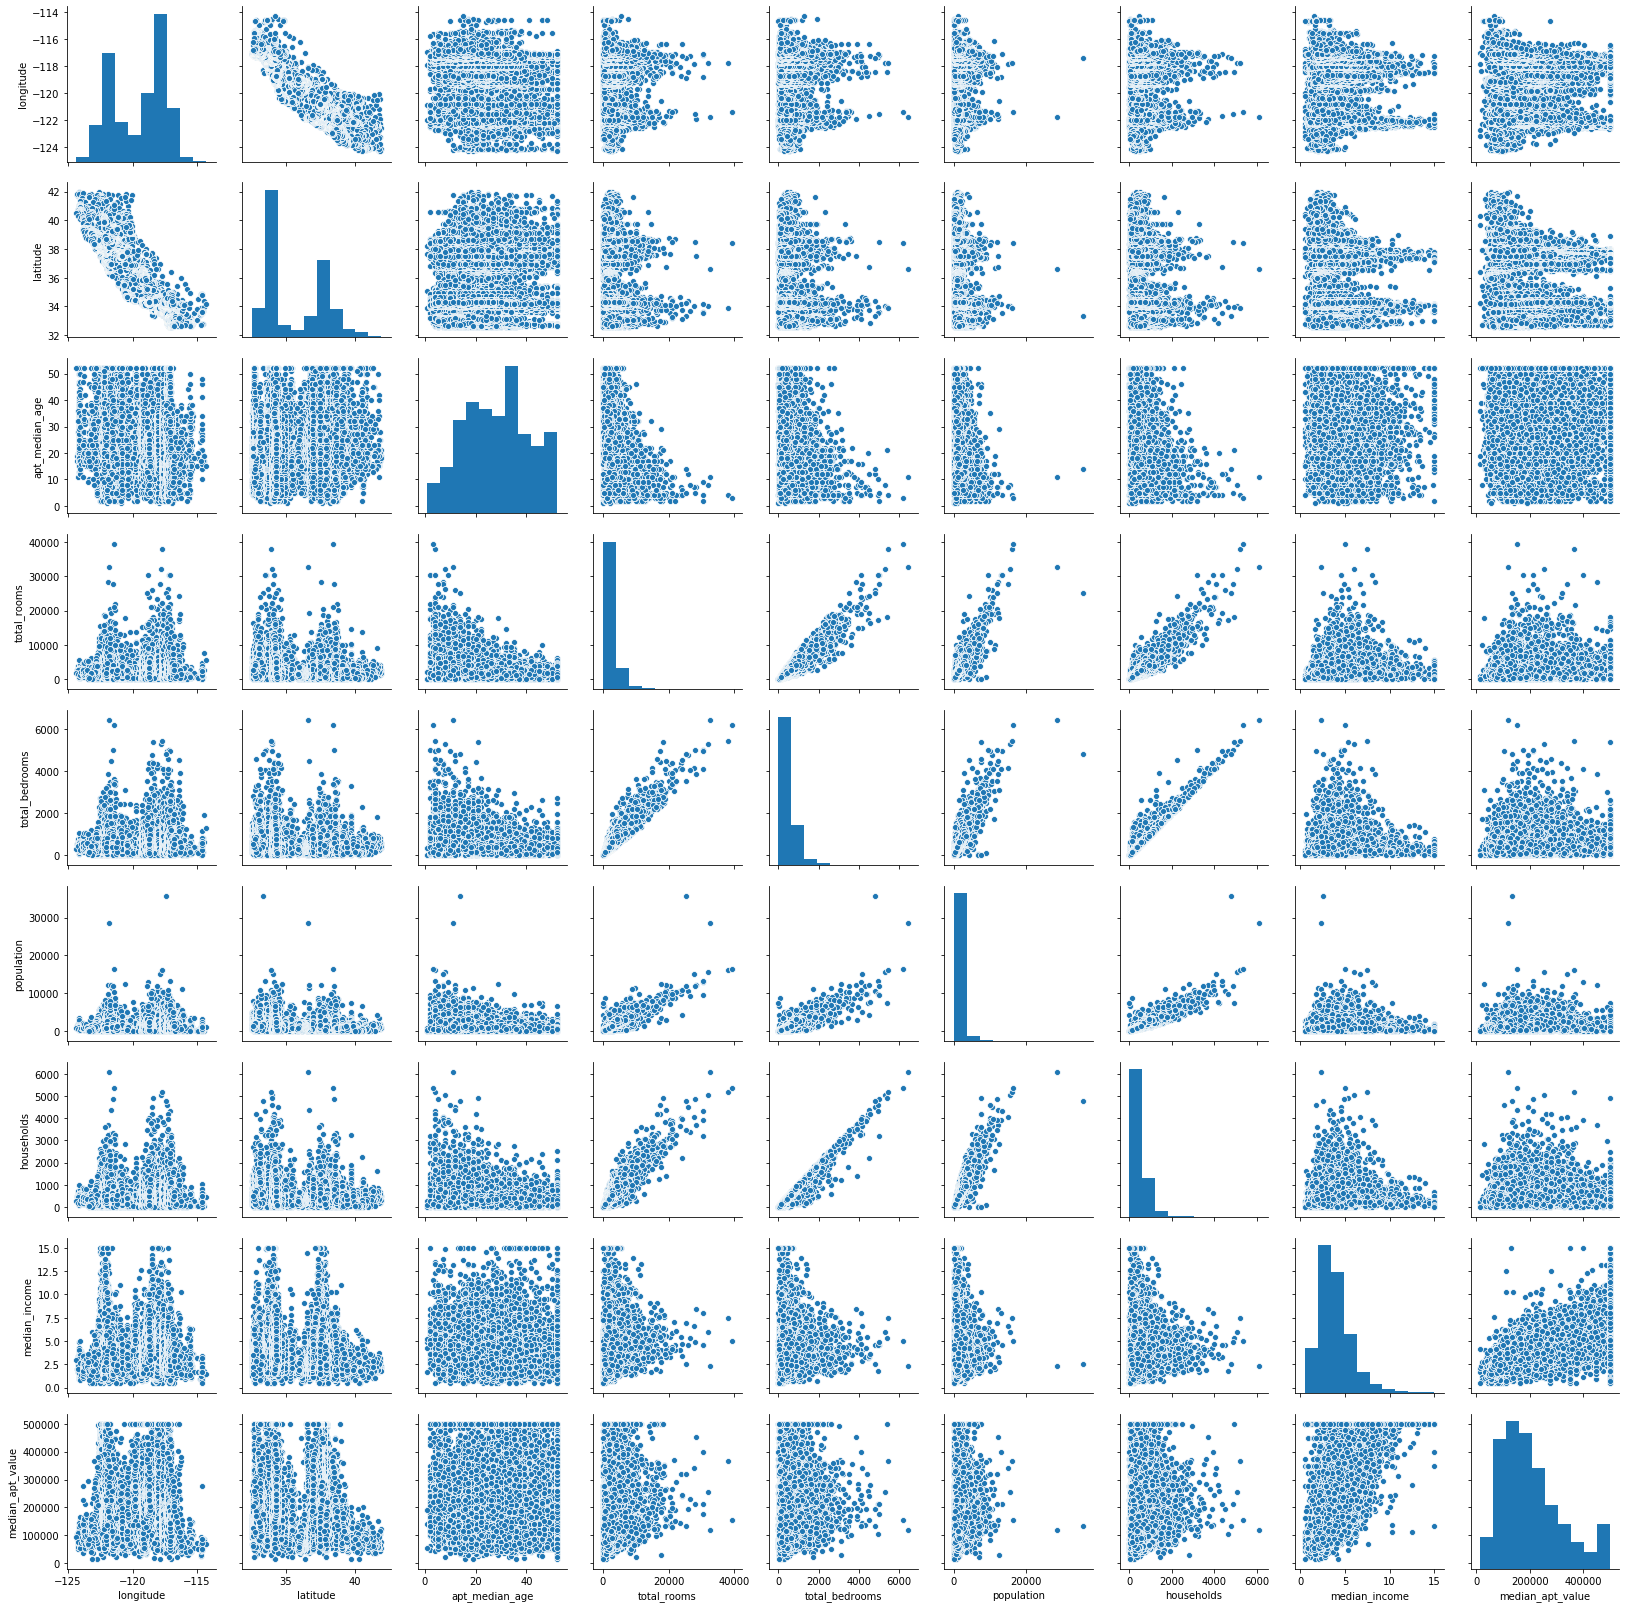

In [15]:
sbn.pairplot(df, kind="scatter")
plt.show()

##### Using this pair wise plot we can get a good overview of pair wise relationship between features.

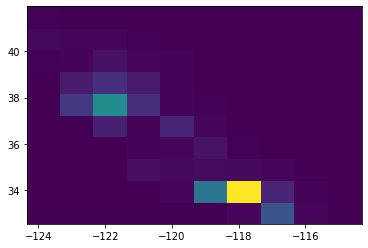

In [16]:
### longitude latiitude
plt.hist2d(df.longitude,df.latitude)
plt.show()

##### Most of observations are near (-122,38) and (-118,34) where (-118,34) has most near it.

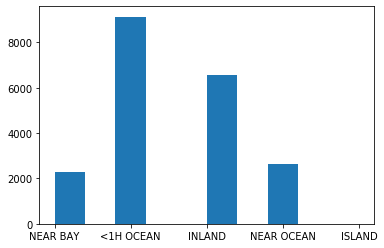

In [17]:
### location
plt.hist(df.location)
plt.show()

##### The factor value location shows the significant difference between different location.  There are two main location with significant large number. In longitude and latitude plot the locations are also highly concentrated. So I would consider deleting the longtitude and latitude feature and use location instead. Also since the location is highly unbalanced, I would consider combing NEAE BAY, NEAR OCEAN and ISLAND together are a single factor.

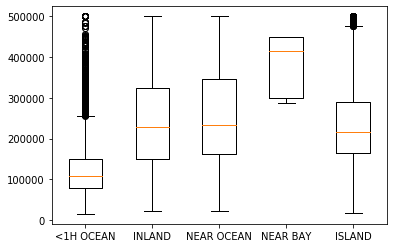

In [18]:
### location v.s. price
a=df.median_apt_value[df.location=='INLAND']
b=df.median_apt_value[df.location=='NEAR OCEAN']
c=df.median_apt_value[df.location=='NEAR BAY']
d=df.median_apt_value[df.location=='ISLAND']
e=df.median_apt_value[df.location=='<1H OCEAN']
plt.boxplot([a,b,c,d,e],labels=df.location.value_counts().index)
plt.show()

##### The price varies significantly according to location. So it's necessary to include location feature in prediction.

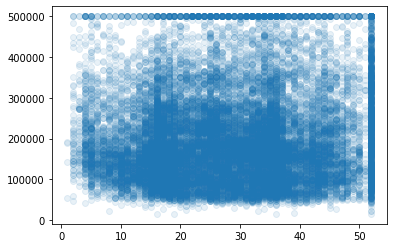

In [19]:
### apt_median_age v.s. median_apt_value
plt.scatter(df.apt_median_age,df.median_apt_value,alpha=0.1)
plt.show()

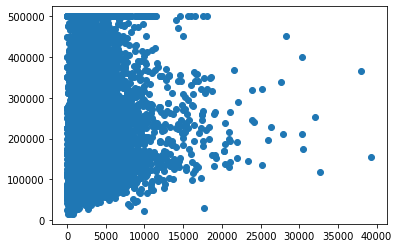

In [20]:
### total_rooms v.s. median_apt_value
plt.scatter(df.total_rooms,df.median_apt_value)
plt.show()

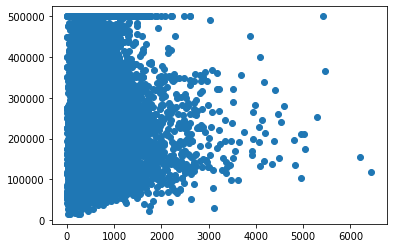

In [21]:
### total_bedrooms v.s. median_apt_value
plt.scatter(df.total_bedrooms,df.median_apt_value)
plt.show()

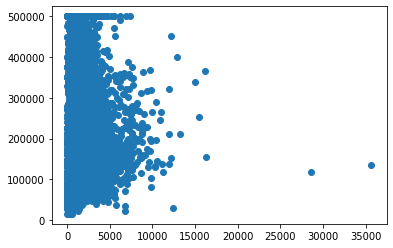

In [22]:
### population v.s. median_apt_value
plt.scatter(df.population,df.median_apt_value)
plt.show()

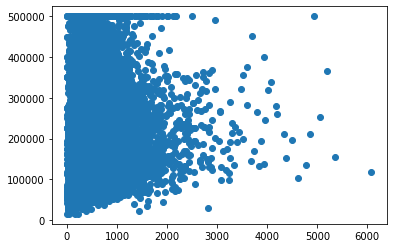

In [23]:
### households v.s. median_apt_value
plt.scatter(df.households,df.median_apt_value)
plt.show()

##### It's obvious that all these features has little linear relation to price.

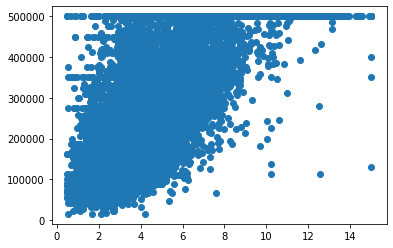

In [24]:
### median_income v.s. median_apt_value
plt.scatter(df.median_income,df.median_apt_value)
plt.show()

##### median_income has comparely closer relation to price. There seems to be a positive relationship.

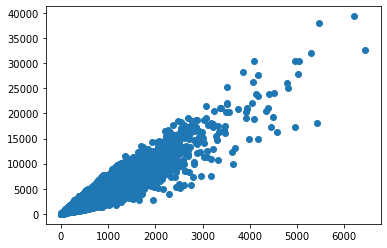

In [25]:
### total_bedrooms v.s. total_rooms
plt.scatter(df.total_bedrooms,df.total_rooms)
plt.show()

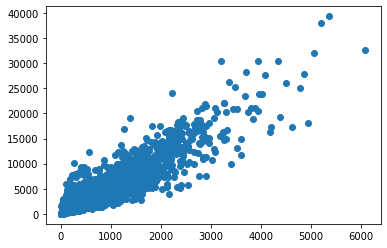

In [26]:
### households v.s. total_rooms
plt.scatter(df.households,df.total_rooms)
plt.show()

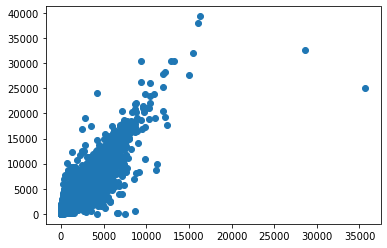

In [27]:
### population v.s. total_rooms
plt.scatter(df.population,df.total_rooms)
plt.show()

##### Intuitionly, number of bedrooms, population and households are highly and positively related to total rooms. So I draw a plot to verify them(which can also be seen in the pair wise plot above). Collinearity may have effect on model. However, since the number of feature is small, I would consider to keep them. Or I will do further experiment like cross-validation to see if I should delete some of highly correlated features.

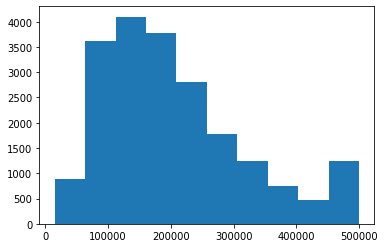

In [28]:
### median_apt_value
plt.hist(df.median_apt_value)
plt.show()

##### From all these plots, I also notice the abnormal value 500000. I guess it's because the data take all the price above 500000 down to 500000

In [29]:
# Apply a transformation to the numerical columns so they all have mean of 0 and variance of 1.
df_trans = df.copy()
mean=df_trans.iloc[:,:-1].mean()
std=df_trans.iloc[:,:-1].std()
df_trans.iloc[:,:-1]=(df_trans.iloc[:,:-1]-mean)/std

In [30]:
df_trans.head()

,longitude,latitude,apt_median_age,total_rooms,total_bedrooms,population,households,median_income,median_apt_value,location
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709,2.129580,NEAR BAY
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181,1.314124,NEAR BAY
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656,1.258663,NEAR BAY
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945,1.165072,NEAR BAY
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881,1.172871,NEAR BAY


In [31]:
# The 'location' column is text. Modify it so you can use it as a numerical feature. 
# Your new dataframe should consist of all the previous numerical columns as well as the new modified features for the "ocean_proximity" column.

In [32]:
df_factor=df['location'].copy()
df_factor=pd.get_dummies(df_factor)
df_num=df_trans.drop('location',axis=1)
df_normal=pd.concat([df_num,df_factor],axis=1)
df_normal.head()

,longitude,latitude,apt_median_age,total_rooms,total_bedrooms,population,households,median_income,median_apt_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709,2.129580,0,0,0,1,0
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181,1.314124,0,0,0,1,0
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656,1.258663,0,0,0,1,0
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945,1.165072,0,0,0,1,0
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881,1.172871,0,0,0,1,0


In [33]:
# Identify which column has missing values. What is your strategy for dealing with those values ?

In [34]:
### Calculate the ratio of missing observation
len(df_normal[df_normal.isnull().values==True])/len(df_normal) 

0.01002906976744186

##### The ratio is small, so I won't consider delete the feature total_bedrooms that contain NaN

In [35]:
df_normal.isnull().any()

longitude           False
latitude            False
apt_median_age      False
total_rooms         False
total_bedrooms       True
population          False
households          False
median_income       False
median_apt_value    False
<1H OCEAN           False
INLAND              False
ISLAND              False
NEAR BAY            False
NEAR OCEAN          False
dtype: bool

##### There is only one feature that contains missing value. I would like to see if the existing value of the feature total_bedrooms varies significantly according to location. If it is, I would try to fill in the missing value with the mean or median group by location.

In [36]:
df_trans.groupby('location')['total_bedrooms'].mean()

location
<1H OCEAN     0.020572
INLAND       -0.009466
ISLAND       -0.278772
NEAR BAY     -0.056214
NEAR OCEAN    0.001768
Name: total_bedrooms, dtype: float64

##### The mean do varies significantly grouped by location compared with median. So I'd like to fill in the missing value with mean grouped by their location.

In [37]:
null=df_normal[df_normal.isnull().values==True].index
cache=df_normal[df_normal.isnull().values==True]
ocean=cache[cache['<1H OCEAN']==1].index
inland=cache[cache['INLAND']==1].index
island=cache[cache['ISLAND']==1].index
bay=cache[cache['NEAR BAY']==1].index
nocean=cache[cache['NEAR OCEAN']==1].index
df_normal.loc[ocean,'total_bedrooms']=0.020572
df_normal.loc[inland,'total_bedrooms']=-0.009466
df_normal.loc[island,'total_bedrooms']= -0.278772
df_normal.loc[bay,'total_bedrooms']=-0.056214
df_normal.loc[nocean,'total_bedrooms']=0.001768

In [38]:
df_normal[df_normal.isnull().values==True]

,longitude,latitude,apt_median_age,total_rooms,total_bedrooms,population,households,median_income,median_apt_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN


# Training  / Model Evaluation

In [39]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [40]:
# Choose a tree-based regressor with default parameters to perform training on the data. Use 10-fold Cross Validation. 
# Set the total number of trees to be 10.
# Choose the proper metric to evaluate the accuracy of your model. 

In [41]:
### Use the origninal data since I don't really need to normalize the data in tree(maybe I can do more experiments like cross-validation to see if I need to) 
### and xgboost can handle missing value it self. Only change the factor value into dummy variables.

df_num=df.drop('location',axis=1)
df_dummy=pd.concat([df_num,df_factor],axis=1)
df_dummy.rename(columns={'<1H OCEAN':'HOCEAN'}, inplace = True)
df_dummy.head()

,longitude,latitude,apt_median_age,total_rooms,total_bedrooms,population,households,median_income,median_apt_value,HOCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [42]:
### Build my own CV, I choose Mean standard error as my metrix.
def CV(x,y,k,model,rand=3):
    x=x.sample(frac=1,random_state=rand)
    y=y.sample(frac=1,random_state=rand)
    l=len(x)
    sl=[i for i in range(0,l,int(l/k)+1)]
    sl.append(l)
    MSE=[]
    for i in range(len(sl)-1):
        testx=x.iloc[sl[i]:sl[i+1],:]
        testy=y.iloc[sl[i]:sl[i+1]]
        testx=np.array(testx)
        testy=np.array(testy)
        trainx=np.r_[x.iloc[:sl[i],:],x.iloc[sl[i+1]:,:]]
        trainy=np.r_[y.iloc[:sl[i]],y.iloc[sl[i+1]:]]
        model.fit(trainx,trainy)
        pred=model.predict(testx)
        mse=np.sqrt(np.sum((pred-testy)**2))/len(testx)
        MSE.append(mse)
    return np.array(MSE)

In [43]:
### print out the list of result of each 10 folds
x=df_dummy.drop(['median_apt_value','longitude','latitude'],axis=1)
y=df_dummy['median_apt_value']
model=xgb.XGBRegressor(n_estimator=10)
result=CV(x,y,10,model)
print(result)

[21:00:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [44]:
### Print out the mean of MSE of 10-fold-CV
print(np.mean(result))

1387.1775189117263


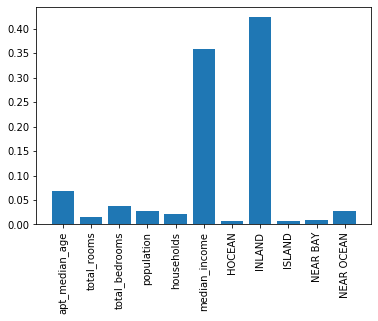

In [45]:
# Use the tree-based regressor to determine the most important features that impact the prediction accuracy.
### Based on gain
importance=model.feature_importances_
plt.bar(x.columns,importance)
plt.xticks(rotation=90)
plt.show() 

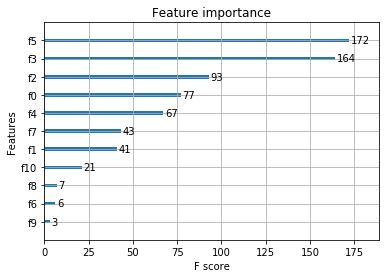

In [46]:
### based on weight
plot_importance(model)  ###plot_importance(model,importance_type='gain')
plt.show()

In [47]:
### print out the three most import feature selected by weight
x.columns[[5,3,2]]

Index(['median_income', 'population', 'total_bedrooms'], dtype='object')

In [48]:
# Use a different machine learning approach to find the most important features in the dataset.
# Compare the results with your findings from the tree-based regressor model.
### Using the normalized and no missing value data processed before. Delete longtitude and latitude.
from sklearn import linear_model
model_lasso = linear_model.Lasso(alpha=0.1)
x=df_normal.drop(['median_apt_value','longitude','latitude'],axis=1)
y=df_normal['median_apt_value']
model_lasso.fit(x,y)
print(model_lasso.coef_)
for i,obj in enumerate(model_lasso.coef_):
    if obj !=0:
        print('Selected feature:',x.columns[i])

[ 0.04282002  0.          0.         -0.          0.          0.56321728
  0.         -0.27094782  0.          0.          0.        ]
Selected feature: apt_median_age
Selected feature: median_income
Selected feature: INLAND


##### Two of methods (Xgboost by gain, Lasso regression) choose apt_median_age, median_income and inland factor as the three most important features. All of the methods choose median_income as the most important feature.

In [49]:
# Fix the total number max depth of the tree  (N) to be 10  and let the max depth of the tree (d) to vary from 2 to 10 in steps of 2 .
# Find out the choice of 'd' that result in the best prediciton accuracy.  (Assume 5 fold cross validation)

In [50]:
### Use the same data as before
x=df_dummy.drop(['median_apt_value','longitude','latitude'],axis=1)
y=df_dummy['median_apt_value']
m=float('inf')
depth=0
for i in range(2,11):
    model=xgb.XGBRegressor(n_estimator=10,max_depth=i)
    result=CV(x,y,5,model)
    avg=np.mean(result)
    if avg<m:
        m=avg
        depth=i
#     print(avg)
print("The best depth is ",depth)

[21:00:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

##### The best depth is 7

In [51]:
print('The MSE is',m)

The MSE is 936.2367650783942
